In [169]:

import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import norm,t,f
from interval import Interval

In [163]:
# np.random.seed(0)
#当方差已知时，使用的是u区间
def u_plot(mu,sigma,sampleNo):
    test_list=[]
    list1=[]
    list2=[]
    for i in range(0,100):
        s = np.random.normal(mu, sigma, sampleNo )
        #求均值
        mean = np.mean(s)
        
#         #求标准差
#         std = np.std(s)
        
        #计算置信区间
        u=norm.ppf(0.95,loc=0,scale=1)
        c1 = mean-sigma/np.sqrt(sampleNo-1)*u
        c2 = mean+sigma/np.sqrt(sampleNo-1)*u
        list1.append(-1*c1)
        list2.append(c2)
    
    
    #绘图
    #print(list1)
    x=np.linspace(0,100,100) # 生成[0,100]等间隔的100个数据
    y=np.zeros(100)
    temp_list=np.array([list1,list2]) # 下置信度和上置信度
    #计算有多少个区间包含真值0
    count=0
    for i in range(0,100):
        if 0 in Interval(-1*list1[i],list2[i]):
            count+=1
    plt.errorbar(x,y,yerr=temp_list,ecolor='black',
                elinewidth=1,fmt='-',ms=3)
    
    print("100个区间中共有",count,"个包含参数真值0")
    plt.show()

100个区间中共有 91 个包含参数真值0


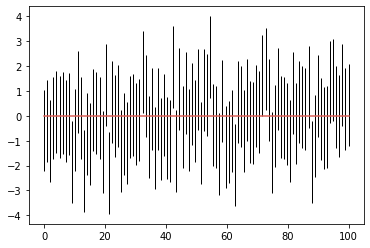

In [164]:
#⽅差已知，sigma^2 = 9 时，n = 10；
u_plot(mu=0,sigma=3,sampleNo=10)

100个区间中共有 92 个包含参数真值0


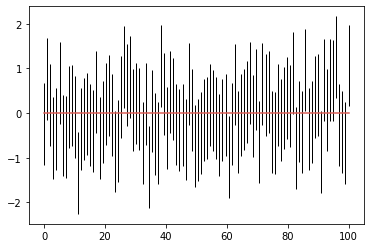

In [168]:
#⽅差已知，sigma^2 = 9 ，n = 30；
u_plot(0,3,30)

In [160]:

#此时置信区间为t区间
def t_plot(mu,sigma,sampleNo):
    test_list=[]
    list1=[]
    list2=[]
    for i in range(0,100):
        s = np.random.normal(mu, sigma, sampleNo )
        #求均值
        mean = np.mean(s)
        
        #求标准差
        std = np.std(s)
        
        #计算置信区间
        t1=t.ppf(0.95,df=sampleNo-1,loc=0,scale=1)#df是自由度-1
        
        c1=mean-std/np.sqrt(sampleNo-1)*t1
        c2=mean+std/np.sqrt(sampleNo-1)*t1
        list1.append(-1*c1)
        list2.append(c2)
    
    
    #绘图
    #print(list1)
    x=np.linspace(0,100,100) # 生成[0,100]等间隔的100个数据
    y=np.zeros(100)
    temp_list=np.array([list1,list2]) # 下置信度和上置信度
    #print(temp_list)
    count=0
    for i in range(0,100):
        if 0 in Interval(-1*list1[i],list2[i]):
            count+=1
    plt.errorbar(x,y,yerr=temp_list,ecolor='black',
                elinewidth=1,fmt='-',ms=3)
    print("100个区间中共有",count,"个包含参数真值0")
    
    plt.show()
    

100个区间中共有 91 个包含参数真值0


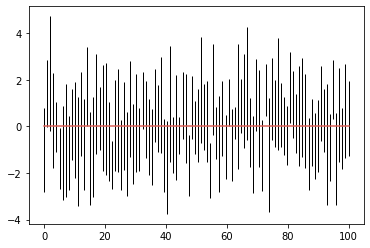

In [161]:
#情况三：⽅差未知时，样本量n = 10；
t_plot(0,3,10)

100个区间中共有 92 个包含参数真值0


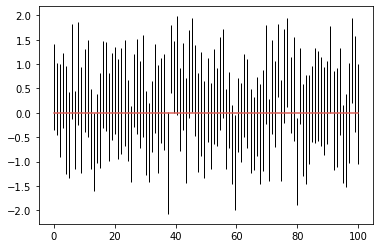

In [162]:
#情况三：⽅差未知时，样本量n = 30；
t_plot(0,3,30)

In [158]:
#结论： 
#1：方差已知与比方差未知相比如果包含参数真值的个数越多估计给出的也越准确
#2：方差一定时，样本量越大，结果中包含参数真值个数越多，估计出的参数也越准确


In [214]:
t1=t.ppf(0.975,df=13,loc=0,scale=1)
print(t1)

2.1603686564610127


In [212]:
#第二个作图
from scipy.special import comb
def g(p):
    sum=0
    for i in range(2,7):
        sum+=comb(20,i)*pow(p,i)*pow(1-p,20-i)
    return sum
ans=[]
for i in range(0,11):
    ans.append(g(i/10))

In [209]:
print(ans)

[1.0, 0.39413308753413345, 0.15586780384381005, 0.39962744757327673, 0.7505133774385867, 0.9423608779907227, 0.9935344654965697, 0.9997389546549744, 0.9999981549951281, 0.9999999997845321, 1.0]


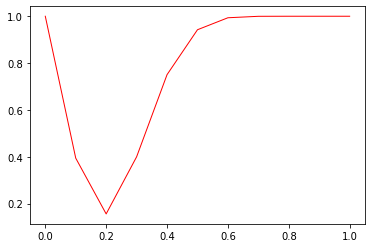

In [211]:
x=np.linspace(0,1,11)
plt.plot(x,ans,color='red',linewidth=1,linestyle='-')

In [213]:
g(0.05)

0.26412652889084853